In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from analysis_parameters import *
from sympy import S, symbols, expand, Symbol
import sympy
import matplotlib.ticker as mticker
# Enter in data

# Enter in values from our simulations
dr_actual =  np.array([0.6,1.0,1.5,2.0,2.5,3.0]) # values used in our simulations

n_crowd_vox = np.array([1970.0, 2096.0, 1791.0, 1418.0, 1090.0, 820.0]) # crowders per voxel
n_rib_vox = np.array([3.5431368807732677, 7.83939708791492, 9.053235633635463,
         8.728526590655443, 8.013776336457527, 7.258097524079424])
n_tern_vox = 42

# E. coli cell data for extrapolation beyond our experimental data:
# Ribosomes
dr_rib = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_rib = np.array([8000,15000,26000,44000,61000,73000])
n_rib = np.array([int(n_i*0.85) for n_i in n_rib])

# Ternary complexes
dr_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
n_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

# Number of crowders
dr_crowd = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_crowd = 1e6*np.array([2.66, 4.3, 5.9, 7.02, 7.65, 7.78])

#Cell mass
dr_mass = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
mass_cell = np.array([159,257,370,512,607,636])

# Cell Volume
dr_vol = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3])
V_cell = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4])

# Nucleoid volume
dr_nuc = np.array([0.4,1.36,2.85])
phi_nuc = np.array([0.17,0.13,0.11])

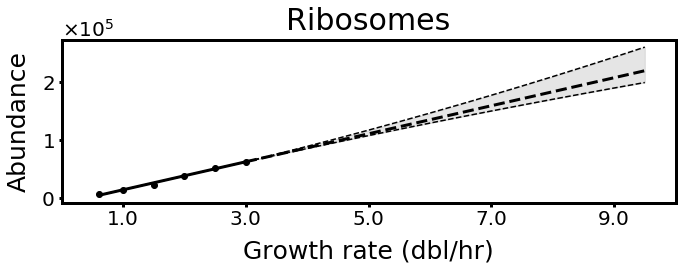

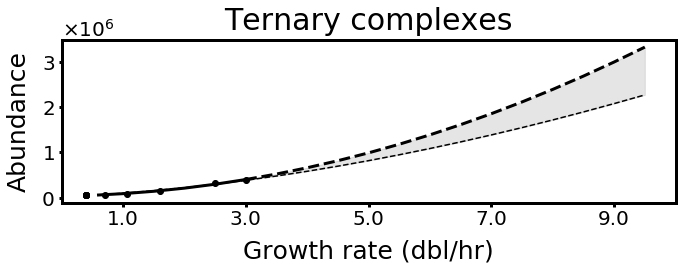

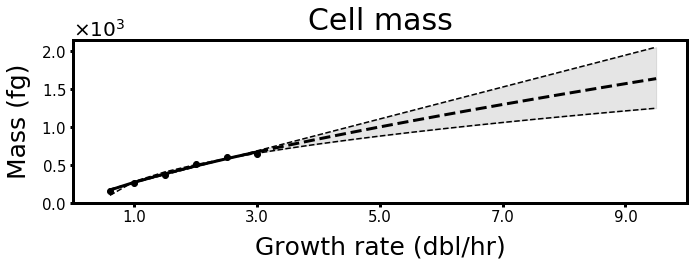

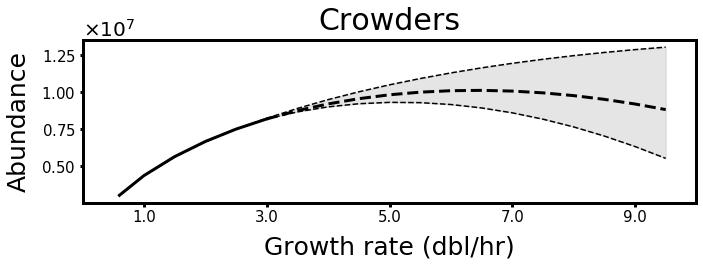

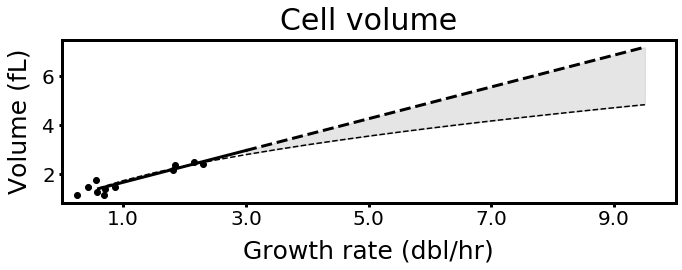

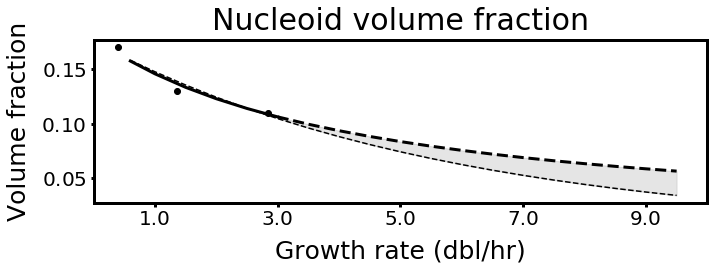

In [2]:
# Perform fits for extrapolation and plot

dr_plot = np.arange(0.5, 9.51, .5) # dr range to plot
dr_plot[0]=0.6
plt.rcParams['axes.linewidth'] = 3
plt.rcParams["figure.figsize"] = (11,3)
plt.rcParams["axes.formatter.limits"] = (-3,3)
plt.rcParams["axes.formatter.use_mathtext"] = True


# Ribosome
p_rib = np.polynomial.polynomial.polyfit(dr_rib, n_rib, 1)
n_rib_pred = np.polynomial.polynomial.polyval(dr_plot, p_rib)
n_rib_up = copy.copy(n_rib_pred)
n_rib_down = copy.copy(n_rib_pred)
val = .2/7
for i in range(len(n_rib_pred)):
    if dr_plot[i] > 3:
        dist = dr_plot[i] - 3
        n_rib_up[i] = (1 + dist*val)*n_rib_pred[i]
        n_rib_down[i] = (1 - .5*dist*val)*n_rib_pred[i]
        
plt.plot(dr_rib, n_rib, 'o', color='black',linewidth=3)
plt.plot(dr_plot[0:6], n_rib_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], n_rib_pred[5:], color='black',linewidth=3,linestyle='dashed')

plt.plot(dr_plot, n_rib_up, '--', color='black')
plt.plot(dr_plot, n_rib_down, '--', color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ribosomes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],n_rib_up[5:],n_rib_down[5:],color='black',alpha=0.1)
plt.show()


# Ternary complex
p_tern = np.polynomial.polynomial.polyfit(dr_tern, n_tern, 2)
n_tern_pred = np.polynomial.polynomial.polyval(dr_plot, p_tern)
n_tern_scaled = n_tern**(1/1.75)
p_tern2 = np.polynomial.polynomial.polyfit(dr_tern, n_tern_scaled, 1)
n_tern_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_tern2)**1.75
plt.plot(dr_tern, n_tern, 'o', color='black',linewidth=3)
plt.plot(dr_plot[0:6], n_tern_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], n_tern_pred[5:], color='black',linewidth=3,linestyle='dashed')
plt.plot(dr_plot, n_tern_pred2, '--', color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ternary complexes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],n_tern_pred[5:],n_tern_pred2[5:],color='black',alpha=0.1)
plt.show()

# Crowder, use the fit of mass
#p_crowd = np.polynomial.polynomial.polyfit(dr_crowd, np.log(7.8e6 - n_crowd), 1)
#n_crowd_pred = 8e6 - np.exp(np.polynomial.polynomial.polyval(dr_plot, p_crowd))
#p_crowd2 = np.polynomial.polynomial.polyfit(dr_crowd, n_crowd**(2), 1)
#n_crowd_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_crowd2)**(1/2)
p_mass = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell**(4/3), 1)
mass_cell_pred = np.polynomial.polynomial.polyval(dr_plot, p_mass)**(3/4)
p_mass2 = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell, 1)
mass_cell_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_mass2)
p_mass3 = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell**2, 1)
mass_cell_pred3 = np.polynomial.polynomial.polyval(dr_plot, p_mass3)**(1/2)
plt.plot(dr_mass, mass_cell, 'o',  color='black')
plt.plot(dr_plot[0:6], mass_cell_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], mass_cell_pred[5:], color='black',linewidth=3,linestyle='dashed')
plt.plot(dr_plot, mass_cell_pred2,'--',color='black')
plt.plot(dr_plot, mass_cell_pred3,'--',color='black')
plt.ylabel('Mass (fg)',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Cell mass',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
ax = plt.gca() # Gets the current axis object
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],mass_cell_pred2[5:],mass_cell_pred3[5:],color='black',alpha=0.1)
plt.show()


rib_mass = 2300*1.66054e-21*10**15
tern_mass = 69*1.66054e-21*10**15
mass_crowder_pred = mass_cell_pred - rib_mass*n_rib_pred - tern_mass*n_tern_pred
mass_crowder_pred2 = mass_cell_pred - rib_mass*n_rib_up - tern_mass*n_tern_pred
mass_crowder_pred3 = mass_cell_pred - rib_mass*n_rib_down - tern_mass*n_tern_pred2
PROTEIN_DENSITY = 1.41 #g/cm^3
CROWDER_RAD = 0.0020
crowd_mass = ((4/3)*np.pi*(CROWDER_RAD**3))*10**-12*PROTEIN_DENSITY*10**15 # single crowder
n_crowd_pred = mass_crowder_pred/crowd_mass
n_crowd_pred2 = mass_crowder_pred2/crowd_mass
n_crowd_pred3 = mass_crowder_pred3/crowd_mass
#plt.plot(dr_crowd, n_crowd, 'o',  color='black')
plt.plot(dr_plot[0:6], n_crowd_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], n_crowd_pred[5:], color='black',linewidth=3,linestyle='dashed')
plt.plot(dr_plot, n_crowd_pred2,'--',color='black')
plt.plot(dr_plot, n_crowd_pred3,'--',color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Crowders',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
ax = plt.gca() # Gets the current axis objectax.set_xlim(0,10)
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],n_crowd_pred2[5:],n_crowd_pred3[5:],color='black',alpha=0.1)
plt.show()



# Cell volume
p_vol = np.polynomial.polynomial.polyfit(dr_vol,V_cell, 1)
V_cell_pred = np.polynomial.polynomial.polyval(dr_plot, p_vol)
p_vol2 = np.polynomial.polynomial.polyfit(dr_vol,V_cell**2, 1)
V_cell_pred2 = np.sqrt(np.polynomial.polynomial.polyval(dr_plot, p_vol2))
plt.plot(dr_vol, V_cell, 'o', color='black',linewidth=3)
plt.plot(dr_plot[0:6], V_cell_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], V_cell_pred[5:], color='black',linewidth=3,linestyle='dashed')
plt.plot(dr_plot, V_cell_pred2, '--', color='black')
plt.ylabel('Volume (fL)',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Cell volume',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],V_cell_pred[5:],V_cell_pred2[5:],color='black',alpha=0.1)
plt.show()


# Nucleoid volume fraction
p_nuc = np.polynomial.polynomial.polyfit(dr_nuc,phi_nuc**-1, 1)
phi_nuc_pred = 1/np.polynomial.polynomial.polyval(dr_plot, p_nuc)
p_nuc2 = np.polynomial.polynomial.polyfit(dr_nuc, np.log(phi_nuc), 1)
phi_nuc_pred2 = np.exp(np.polynomial.polynomial.polyval(dr_plot, p_nuc2))
plt.plot(dr_nuc, phi_nuc, 'o', color='black',linewidth=3)
plt.plot(dr_plot[0:6], phi_nuc_pred[0:6], color='black',linewidth=3)
plt.plot(dr_plot[5:], phi_nuc_pred[5:], color='black',linewidth=3,linestyle='dashed')
plt.plot(dr_plot, phi_nuc_pred2, '--', color='black')
plt.ylabel('Volume fraction',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Nucleoid volume fraction',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
ax.set_xlim(0,10)
ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.fill_between(dr_plot[5:],phi_nuc_pred[5:],phi_nuc_pred2[5:],color='black',alpha=0.1)




plt.show()

In [3]:
# This function takes in the extrapolated raw numbers of each species and calculates relevant
# parameters, including the species and total volume fractions and the ratios of different 
# species and amount in a voxel.
def calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred):
    
    # Volume and amount of species in cytoplasm
    V_cyto = V_cell_pred*(1-phi_nuc_pred) # volume of cytoplasm
    n_rib_cyto = n_rib_pred # assume ribosomes are excluded from the nucleoid region
    n_tern_cyto = n_tern_pred*(1-phi_nuc_pred)
    n_crowd_cyto = n_crowd_pred*(1-phi_nuc_pred)
    
    # Voxel parameters and ratios:
    rib_vox = 42*n_rib_cyto/n_tern_cyto
    crowd_vox = 42*n_crowd_cyto/n_tern_cyto
    ratio_cr = n_crowd_cyto/n_rib_cyto
    ratio_tr = n_tern_cyto/n_rib_cyto
    
    # Size of each species:
    r_rib = 0.01305 # radius in um (note um**3 is same as fL)
    r_tern = 0.0059
    r_crowd = 0.002
    
    # Volume taken up by each species
    V_rib = n_rib_cyto*(4/3)*np.pi*r_rib**3
    V_tern = n_tern_cyto*(4/3)*np.pi*r_tern**3
    V_crowd = n_crowd_cyto*(4/3)*np.pi*r_crowd**3
    
    # Volume fractions
    phi_rib = V_rib/V_cyto
    phi_tern = V_tern/V_cyto
    phi_crowd = V_crowd/V_cyto
    phi_tot = phi_rib + phi_tern + phi_crowd
    
    # Volume of voxel
    V_vox = 42*(4/3)*np.pi/phi_tern # unitless, normalized by r_tern

    return phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox
    
    

In [4]:
# Before we calculate the bounds, let's calculate the relevant voxel values for 
# the primary extrapolation.

phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox = calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred)

In [5]:
# Now, we want to calculate upper and lower bounds to the plots.  First, we need to concaconate
# the values being tested into arrays.

n_rib_ext = np.array([n_rib_down, n_rib_up])
n_tern_ext = np.array([n_tern_pred, n_tern_pred2])
n_crowd_ext = np.array([n_crowd_pred2, n_crowd_pred3])
V_cell_ext = np.array([V_cell_pred, V_cell_pred2])
phi_nuc_ext = np.array([phi_nuc_pred, phi_nuc_pred2])

params = [[1, 1, 1, 1, 1], [1, 1, 1, 1, 2], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [2, 1, 1, 1, 1],
          [2, 1, 1, 1, 2], [2, 1, 2, 1, 1], [2, 2, 1, 1, 1], [1, 2, 2, 1, 1], [2, 2, 2, 2, 2]]
params = []
for ii in range(2):
    for jj in range(2):
        for kk in range(2):
            for ll in range(2):
                for mm in range(2):
                    param = [ii, jj, kk, ll, mm]
                    params.append(param)
idx = 0

# Loop through all the sets of parameters above and store in one array.
for paramset in params:
    idx0 = paramset[0]-1
    idx1 = paramset[1]-1
    idx2 = paramset[2]-1
    idx3 = paramset[3]-1
    idx4 = paramset[4]-1
    
    temp = calc_values(n_rib_ext[idx0], n_tern_ext[idx1], n_crowd_ext[idx2], V_cell_ext[idx3], phi_nuc_ext[idx4])

    if idx == 0: # initialize
        phi_rib_temp = temp[0]
        phi_tern_temp = temp[1]
        phi_crowd_temp = temp[2]
        phi_tot_temp = temp[3]
        rib_vox_temp = temp[4]
        crowd_vox_temp = temp[5]
        ratio_cr_temp = temp[6]
        ratio_tr_temp = temp[7]
        V_vox_temp = temp[8]
        

    else: # concaconate
        phi_rib_temp = np.vstack((phi_rib_temp, temp[0]))
        phi_tern_temp = np.vstack((phi_tern_temp, temp[1]))
        phi_crowd_temp = np.vstack((phi_crowd_temp, temp[2]))
        phi_tot_temp = np.vstack((phi_tot_temp, temp[3]))
        rib_vox_temp = np.vstack((rib_vox_temp, temp[4]))
        crowd_vox_temp = np.vstack((crowd_vox_temp, temp[5]))
        ratio_cr_temp = np.vstack((ratio_cr_temp, temp[6]))
        ratio_tr_temp = np.vstack((ratio_tr_temp, temp[7]))
        V_vox_temp = np.vstack((V_vox_temp, temp[8]))

    idx += 1
    
# Find maximum and minimum of each variable:
phi_rib_max = np.max(phi_rib_temp,axis=0)   
phi_rib_max = np.max(phi_rib_temp, axis=0)
phi_tern_max = np.max(phi_tern_temp, axis=0)
phi_crowd_max = np.max(phi_crowd_temp, axis=0)
phi_tot_max = np.max(phi_tot_temp, axis=0)
rib_vox_max = np.max(rib_vox_temp, axis=0)
crowd_vox_max = np.max(crowd_vox_temp, axis=0)
ratio_cr_max = np.max(ratio_cr_temp, axis=0)
ratio_tr_max = np.max(ratio_tr_temp, axis=0)
V_vox_max = np.max(V_vox_temp, axis=0)

phi_rib_min = np.min(phi_rib_temp,axis=0)   
phi_rib_min = np.min(phi_rib_temp, axis=0)
phi_tern_min = np.min(phi_tern_temp, axis=0)
phi_crowd_min = np.min(phi_crowd_temp, axis=0)
phi_tot_min = np.min(phi_tot_temp, axis=0)
rib_vox_min = np.min(rib_vox_temp, axis=0)
crowd_vox_min = np.min(crowd_vox_temp, axis=0)
ratio_cr_min = np.min(ratio_cr_temp, axis=0)
ratio_tr_min = np.min(ratio_tr_temp, axis=0)
V_vox_min = np.min(V_vox_temp, axis=0)
    

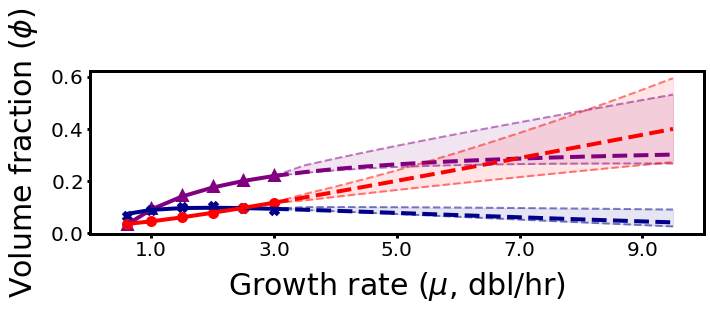

[0.45510788 0.5098258  0.56444405 0.61936661 0.6748503  0.73106352
 0.78811897 0.84609284 0.90503673 0.96498518 1.02596074 1.08797734
 1.15104267 1.21515983]


In [6]:
# Plot the values

# Values from our simulations:
phi_rib_actual = np.array([0.0321522741565134,0.0909471442874548,0.140978112775076,
                           0.175335729248951,0.199905287115802,0.217971630008904])
phi_tern_actual =  np.array([0.0352206653600450,0.0450277445851937,0.0604396107494565,
                             0.0779656448023790,0.0968190581820406,0.116560382212636])
phi_crowd_actual =  np.array([0.0643499840914683,0.0875298398622069,0.100392647231079,
                              0.102533118751904,0.0978750536867374,0.0886440269099349])
phi_tot_actual = phi_rib_actual + phi_tern_actual + phi_crowd_actual

#plt.plot(dr_actual,phi_tot_actual,label=r'$\mathregular{\phi_{ vox}}$',color='black',
#         marker='s',markersize=6,markeredgewidth=5,linewidth=4)
plt.plot(dr_actual,phi_rib_actual,label=r'$\mathregular{\phi_{ rib}}$',color='purple',
         marker='^',markersize=6,markeredgewidth=5,linewidth=0)
plt.plot(dr_actual,phi_crowd_actual,label=r'$\mathregular{\phi_{ crowd}}$',color='darkblue',
         marker='x',markersize=8,markeredgewidth=5,linewidth=0)
plt.plot(dr_actual,phi_tern_actual,label=r'$\mathregular{\phi_{ tern}}$',color='red',
         marker='o',markersize=6,markeredgewidth=5,linewidth=0)

#plt.plot(dr_plot[0:6],phi_tot[0:6],color='black',linewidth=4)
plt.plot(dr_plot[0:6],phi_rib[0:6],color='purple',linewidth=4)
plt.plot(dr_plot[0:6],phi_crowd[0:6],color='darkblue',linewidth=4)
plt.plot(dr_plot[0:6],phi_tern[0:6],color='red',linewidth=4)

#plt.plot(dr_plot[5:],phi_tot[5:],'--',color='black',linewidth=4)
plt.plot(dr_plot[5:],phi_rib[5:],'--',color='purple',linewidth=4)
plt.plot(dr_plot[5:],phi_crowd[5:],'--',color='darkblue',linewidth=4)
plt.plot(dr_plot[5:],phi_tern[5:],'--',color='red',linewidth=4)

#plt.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_max[6:]),color='black', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_rib[5],phi_rib_max[6:]),color='purple', linestyle='dashed',linewidth=2,alpha=0.5)
plt.plot(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_max[6:]),color='darkblue', linestyle='dashed',linewidth=2,alpha=0.5)
plt.plot(dr_plot[5:],np.append(phi_tern[5],phi_tern_max[6:]),color='red', linestyle='dashed',linewidth=2,alpha=0.5)

#plt.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),color='black', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_rib[5],phi_rib_min[6:]),color='purple', linestyle='dashed',linewidth=2,alpha=0.5)
plt.plot(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_min[6:]),color='darkblue', linestyle='dashed',linewidth=2,alpha=0.5)
plt.plot(dr_plot[5:],np.append(phi_tern[5],phi_tern_min[6:]),color='red', linestyle='dashed',linewidth=2,alpha=0.5)

#plt.fill_between(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),np.append(phi_tot[5],phi_tot_max[6:]),color='black',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_rib[5],phi_rib_min[6:]),np.append(phi_rib[5],phi_rib_max[6:]),color='purple',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_min[6:]),np.append(phi_crowd[5],phi_crowd_max[6:]),color='darkblue',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_tern[5],phi_tern_min[6:]),np.append(phi_tern[5],phi_tern_max[6:]),color='red',alpha=0.1)

plt.rcParams["figure.figsize"] = (8,7)
plt.ylabel("Volume fraction ($\phi$)",size=30,labelpad=10)
plt.xlabel("Growth rate ($\mu$, dbl/hr)",size=30,labelpad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
plt.xlim(0,10)
ax = plt.gca() # Gets the current axis object

ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])

plt.show()
print(phi_tot_max[5:])

In [7]:
#For Emma
#Max packing calculations

In [8]:
import numpy as np
%load_ext autoreload
import pandas as pd
cols = pd.read_excel('maxPackData.xlsx',header=None,skiprows=[0])
gr=cols[0]
phi_max=cols[5]
#print(dr_plot)
phi_tot_sub = phi_tot
phi_tot_max_sub = phi_tot_max
phi_tot_min_sub = phi_tot_min

print(dr_plot[[0,1,2,3,4,5,6,7,11,15,18]][5:])
print(np.take(gr,[5,6,7,8,9,10]))
print(np.append(phi_tot_sub[5],phi_tot_min_sub[6:]))
print(len(phi_tot_min_sub))
print(dr_plot)

[3.  3.5 4.  6.  8.  9.5]
5     3.0
6     3.5
7     4.0
8     4.5
9     5.0
10    5.5
Name: 0, dtype: float64
[0.42856814 0.44533736 0.46365576 0.47902839 0.4922054  0.50370675
 0.51390287 0.52306384 0.5313905  0.53903484 0.54611363 0.55271783
 0.55891913 0.56477473]
19
[0.6 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5]


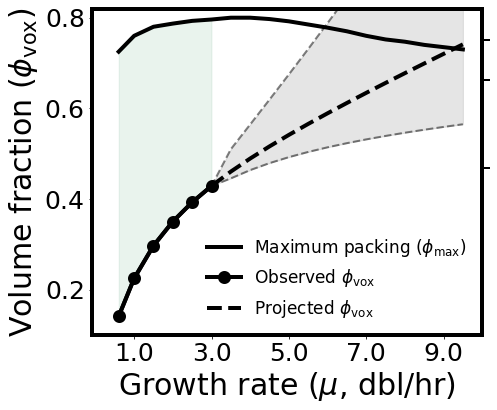

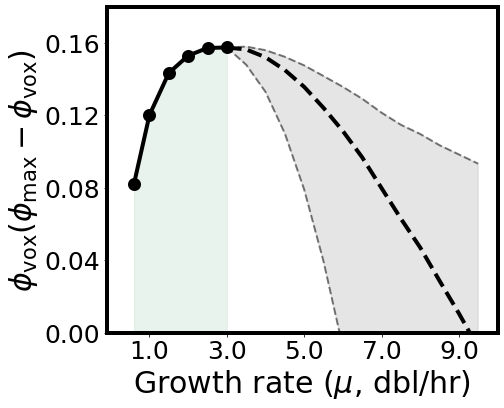

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,6))

#ax.plot(gr, phi_max_high,zorder=1,linewidth=2,color='black')
ax.plot(gr, phi_max,zorder=1,linewidth=4,color='black',label='Maximum packing ($\phi_{\mathrm{max}}$)')
#ax.fill_between(gr, phi_max, [0.9]*12, color='darkred',alpha=0.3)

ax.plot(dr_plot[0:6], phi_tot[0:6],zorder=1,linewidth=4,color='black')
ax.errorbar(dr_plot[0:6], phi_tot[0:6],zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=4,elinewidth=2,label='Observed $\phi_{\mathrm{vox}}$')
ax.plot(dr_plot[5:], phi_tot[5:],zorder=1,linewidth=4,color='black',linestyle='dashed',label='Projected $\phi_\mathrm{vox}$')
#ax.errorbar(gr[4:-1], phi_tot[0:5],zorder=1,color='black',marker='o',markersize=12,markeredgewidth=5,linewidth=0,elinewidth=2)


ax.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_max[6:]),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.fill_between(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),np.append(phi_tot[5],phi_tot_max[6:]),color='black',alpha=0.1)
ax.set_ylabel('Volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylim(0.1,0.82)

ax.fill_between(gr[0:6],phi_tot_sub[0:6], phi_max[0:6],color='seagreen',alpha=0.1)
#ax.fill_between(gr[5:8],phi_tot_sub[5:8], phi_max[5:8],color='darkgoldenrod',alpha=0.1)

fig,ax1=plt.subplots(1,1,figsize=(7,6))
ax1.errorbar(gr[0:6],phi_tot_sub[0:6]*(phi_max[0:6]-phi_tot_sub[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax1.plot(gr[0:6],phi_tot_sub[0:6]*(phi_max[0:6]-phi_tot_sub[0:6]),linewidth=4,color='black')
ax1.plot(gr[5:],phi_tot_sub[5:]*(phi_max[5:]-phi_tot_sub[5:]),linewidth=4,color='black',linestyle='dashed')

phi_tot_additional_high = np.append(phi_tot_sub[5],phi_tot_max_sub[6:])
phi_tot_additional_low = np.append(phi_tot_sub[5],phi_tot_min_sub[6:])
phi_maxs = phi_max[5:]
grs = gr[5:]
ax1.plot(grs,phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.plot(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.fill_between(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',alpha=0.1)

ax1.fill_between(gr[0:6],[0]*6, phi_tot[0:6]*(phi_max[0:6]-phi_tot[0:6]),color='seagreen',alpha=0.1)
#ax1.fill_between(gr[5:11],[0]*6, phi_tot[5:11]*(phi_max[5:11]-phi_tot[5:11]),color='darkgoldenrod',alpha=0.1)

#ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
#ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),linewidth=4,color='black')
#ax1.plot(gr[5:],phi_tot[5:]*(phi_max_high[5:]-phi_tot[5:]),linewidth=4,color='black',linestyle='dashed')

ax1.set_ylabel('$\phi_{\mathrm{vox}}(\phi_{\mathrm{max}}-\phi_{\mathrm{vox}})$',size=30,color='black')
#ax1.fill_between(gr, [0]*12, [-0.17]*12, color='darkred',alpha=0.3)
ax1.set_ylim(0,0.18)
ax1.plot(dr_plot,[0]*19,color='black',linewidth=4)
ax1.set_yticks([0,0.04,0.08,0.12,0.16])
ax1.set_yticklabels(['0.00','0.04','0.08','0.12','0.16'])

ax2 = ax.twinx()
ax2.set_ylim(0,0.82)
ax2.set_yticks([0.42,0.64,0.74])
ax2.set_yticklabels(['','',''])
ax2.tick_params(which='major',length=8,direction='out')
ax2.yaxis.set_tick_params(width=2)

handles, labels = ax.get_legend_handles_labels()
order=[0,2,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=4, prop={'size': 17},frameon=False)


for _,ax in enumerate([ax,ax1,ax2]):
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('Growth rate ($µ$, dbl/hr)',size=30)
    ax.set_xlim(-0.1,10)
    ax.set_xticks([1.0,3.0,5.0,7.0,9.0])
    ax.set_xticklabels(['1.0','3.0','5.0','7.0','9.0'])

[0.6 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] [0.14090336 0.22457746 0.29675282 0.35000389 0.39256603 0.42856814
 0.46030391 0.48914138 0.51594138 0.54126891 0.56550782 0.5889264
 0.61171678 0.63401945 0.65593898 0.67755443 0.69892643 0.72010206
 0.74111824]


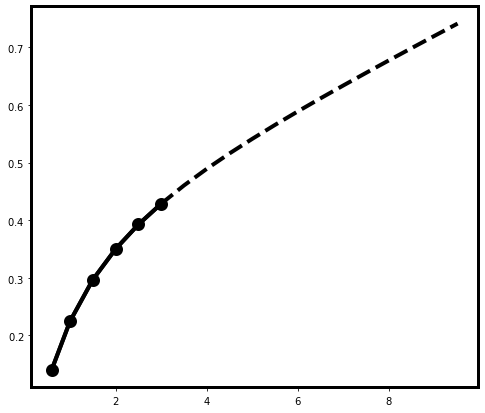

In [12]:
print(dr_plot,phi_tot)
fig,ax = plt.subplots()
ax.plot(dr_plot[0:6], phi_tot[0:6],zorder=1,linewidth=4,color='black')
ax.errorbar(dr_plot[0:6], phi_tot[0:6],zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=4,elinewidth=2,label='Observed $\phi_{\mathrm{vox}}$')
ax.plot(dr_plot[5:], phi_tot[5:],zorder=1,linewidth=4,color='black',linestyle='dashed',label='Projected $\phi_\mathrm{vox}$')
#ax.errorbar(gr[4:-1], phi_tot[0:5],zorder=1,color='black',marker='o',markersize=12,markeredgewidth=5,linewidth=0,elinewidth=2)


In [18]:
phi_tot_min_sub

array([0.13846615, 0.21512008, 0.2871443 , 0.34780797, 0.39256443,
       0.42295479, 0.44533736, 0.46365576, 0.51390287, 0.54611363])

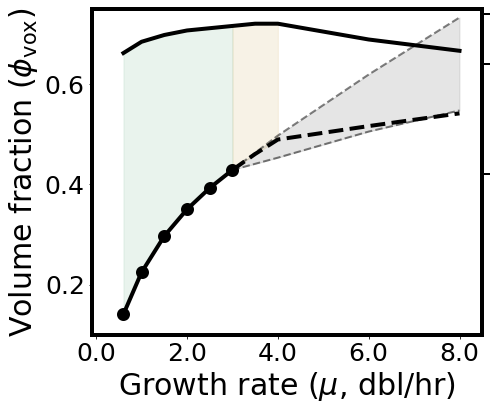

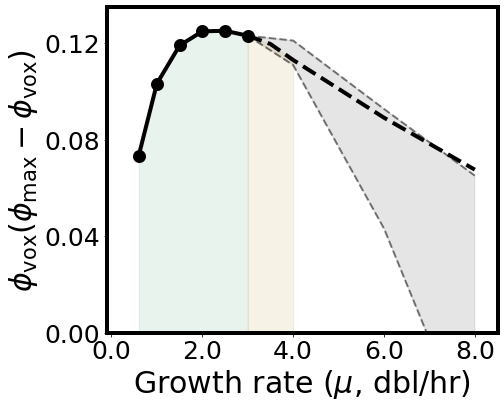

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,6))

ax.plot(gr[0:6], phi_tot[0:6],zorder=1,linewidth=4,color='black')
ax.errorbar(gr[0:6], phi_tot[0:6],zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax.plot(gr[5:10], phi_tot[5:10],zorder=1,linewidth=4,color='black',linestyle='dashed')
#ax.errorbar(gr[4:-1], phi_tot[0:5],zorder=1,color='black',marker='o',markersize=12,markeredgewidth=5,linewidth=0,elinewidth=2)

#ax.plot(gr, phi_max_high,zorder=1,linewidth=2,color='black')
ax.plot(gr[0:], phi_max_low[0:-2],zorder=1,linewidth=4,color='black')
#ax.fill_between(gr, phi_max_low, [0.9]*12, color='darkred',alpha=0.3)

ax.plot(np.append(3.0,np.array(gr_spread[39:42])),np.append(phi_tot[5],np.array(phi_max_spread[39:42])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.plot(np.append(3.0,np.array(gr_spread[19:22])),np.append(phi_tot[5],np.array(phi_max_spread[19:22])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.fill_between(np.append(3.0,np.array(gr_spread[19:22])),np.append(phi_tot[5],np.array(phi_max_spread[39:42])),np.append(phi_tot[5],np.array(phi_max_spread[19:22])),color='black',alpha=0.1)
ax.set_ylabel('Volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylim(0.1,0.75)

ax.fill_between(gr[0:6],phi_tot[0:6], phi_max_low[0:6],color='seagreen',alpha=0.1)
ax.fill_between(gr[5:8],phi_tot[5:8], phi_max_low[5:8],color='darkgoldenrod',alpha=0.1)


fig,ax1=plt.subplots(1,1,figsize=(7,6))
#ax1.plot(gr,phi_max_high-phi_tot)
ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),linewidth=4,color='black')
ax1.plot(gr[5:10],phi_tot[5:10]*(phi_max_low[5:10]-phi_tot[5:10]),linewidth=4,color='black',linestyle='dashed')

#ax1.plot(np.append(3.0,np.array(gr_spread[39:43])),np.take(phi_tot,[5,7,8,9,11])*(np.take(phi_max_low,[5,7,8,9,11])-np.append(phi_tot[5],np.array(phi_max_spread[39:43]))),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
grs = np.append(3.0,np.array(gr_spread[19:22]))
phi_tot_additional_high = np.append(phi_tot[5],np.array(phi_max_spread[19:22]))
phi_tot_additional_low = np.append(phi_tot[5],np.array(phi_max_spread[39:42]))
phi_maxs = np.take(phi_max_low,[5,7,8,9])
ax1.plot(grs,phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.plot(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.fill_between(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',alpha=0.1)

ax1.fill_between(gr[0:6],[0]*6, phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),color='seagreen',alpha=0.1)
ax1.fill_between(gr[5:8],[0]*3, phi_tot[5:8]*(phi_max_low[5:8]-phi_tot[5:8]),color='darkgoldenrod',alpha=0.1)

#ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
#ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),linewidth=4,color='black')
#ax1.plot(gr[5:],phi_tot[5:]*(phi_max_high[5:]-phi_tot[5:]),linewidth=4,color='black',linestyle='dashed')

ax1.set_ylabel('$\phi_{\mathrm{vox}}(\phi_{\mathrm{max}}-\phi_{\mathrm{vox}})$',size=30,color='black')
#ax1.fill_between(gr, [0]*12, [-0.17]*12, color='darkred',alpha=0.3)
ax1.set_ylim(0,0.135)
#ax1.plot(dr_plot,[0]*16,color='black',linewidth=4)
ax1.set_yticks([0,0.04,0.08,0.12])
ax1.set_yticklabels(['0.00','0.04','0.08','0.12'])

ax2 = ax.twinx()
ax2.set_ylim(0.1,0.75)
ax2.set_yticks([0.42,0.64,0.74])
ax2.set_yticklabels(['','',''])
ax2.tick_params(which='major',length=8,direction='out')
ax2.yaxis.set_tick_params(width=2)

for _,ax in enumerate([ax,ax1,ax2]):
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('Growth rate ($µ$, dbl/hr)',size=30)
    ax.set_xlim(-0.1,8.5)
    ax.set_xticks([0.0,2.0,4.0,6.0,8.0])
    ax.set_xticklabels(['0.0','2.0','4.0','6.0','8.0'])

In [282]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '191010_1846' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
Error on expt  561
Error on expt  563
Error on expt  566
Error on expt  567
Error on expt  568
Error on expt  569
Error on expt  570
Error on expt  573
Error on expt  575
Error on expt  577
Error on expt  578
Error on expt  580
Error on expt  583
Error on expt  584
Error on expt  585
Error on expt  587
Error on expt  589
Error on expt  592
Error on expt  594
Error on expt  595
Error on expt  596
Error on expt  597
Error on expt  598
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72174977]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00945468]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.07832364]


In [1]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '210208_1619' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,7.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059,0.0612*1/0.0059,0.0565*1/0.0059,0.0529*1/0.0059,0.0501*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221, 5.186440677966101, 4.788135593220339, 4.483050847457627, 4.245762711864407]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
gr: 4.0
gr: 5.0
gr: 6.0
gr: 7.0
Error on expt  999
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72348396
 3.71088555 3.50488844 3.49399192 3.36633281]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00827989
 0.00830245 0.00619851 0.00615255 0.00519806]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.08855538
  3.01422473  1.79884177  1.73455231  0.98136358]


In [3]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '210208_1754' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059,0.0612*1/0.0059,0.0565*1/0.0059,0.0529*1/0.0059,0.0501*1/0.0059,0.0477*1/0.0059,0.0458*1/0.0059,0.0441*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221, 5.186440677966101, 4.788135593220339, 4.483050847457627, 4.245762711864407, 4.0423728813559325, 3.88135593220339, 3.7372881355932206]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
gr: 4.0
gr: 5.0
gr: 6.0
gr: 7.0
gr: 8.0
gr: 9.0
gr: 10.0
Error on expt  1299
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72348396
 3.57200154 3.50488844 3.49399192 3.36607996 3.3969799  3.29466446
 3.1716536 ]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00827989
 0.00689025 0.00619851 0.00615255 0.00517577 0.00591962 0.00622752
 0.00679012]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.08855538
  2.19480908  1.79884177  1.73455231  0.97987176  1.16218144  0.55852031
 -0.16724374]
